**author :** Ahmed Traore

Dans ce notebook nous essayerons de faire le projet final du cours Network Analysis and Modeling. Nous allons répondre aux differentes questions posées dans le sujet du projet et les codes seront implémentés dans ce notebook.

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import networkx as nx
import sklearn
import sknetwork as skn
from pathlib import Path
from tqdm import tqdm
from collections import Counter

## **Question 1 : Reading of articles**

## **Question 2 :  Social Network Analysis with the Facebook100 Dataset**

### **(a) Degree distribution analysis**

In [2]:
networks_selected = ['Caltech36', 'MIT8', 'Johns Hopkins55']
net1 = nx.read_gml(f'data/{networks_selected[0]}.gml')
net2 = nx.read_gml(f'data/{networks_selected[1]}.gml')
net3 = nx.read_gml(f'data/{networks_selected[2]}.gml')

In [3]:
net1.number_of_edges()
nx.read_gml(f'data/{networks_selected[2]}.gml')

Le degree de distribution montre la distribution des degrés i.e combien de noeuds ont 1, 2 ou plusieurs connexion et donc celà permet d'avoir une idée globale de comment est repartir le graphe dans son entièreté.

In [4]:
from collections import Counter

def degree_distribution(G, normalize=False):
    """Retourne {degré: effectif} ou proportions si normalize=True."""
    degs = [d for _, d in G.degree()]
    counts = Counter(degs)
    result = dict(sorted(counts.items()))
    if normalize:
        n = G.number_of_nodes() or 1
        result = {k: v / n for k, v in result.items()}
    return result

def degree_summary(G):
    """Statistiques simples sur les degrés."""
    degs = [d for _, d in G.degree()]
    return {
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "min": min(degs) if degs else 0,
        "max": max(degs) if degs else 0,
        "mean": float(np.mean(degs)) if degs else 0.0,
        "median": float(np.median(degs)) if degs else 0.0,
    }    

In [5]:
degree_distribution(net1)
#degree_summary(net1)

{1: 35,
 2: 32,
 3: 15,
 4: 12,
 5: 10,
 6: 8,
 7: 10,
 8: 8,
 9: 21,
 10: 6,
 11: 14,
 12: 11,
 13: 10,
 14: 12,
 15: 8,
 16: 9,
 17: 3,
 18: 8,
 19: 6,
 20: 11,
 21: 5,
 22: 13,
 23: 11,
 24: 8,
 25: 5,
 26: 9,
 27: 6,
 28: 11,
 29: 5,
 30: 16,
 31: 5,
 32: 9,
 33: 10,
 34: 8,
 35: 12,
 36: 4,
 37: 7,
 38: 9,
 39: 11,
 40: 12,
 41: 12,
 42: 6,
 43: 5,
 44: 8,
 45: 13,
 46: 6,
 47: 8,
 48: 9,
 49: 7,
 50: 5,
 51: 8,
 52: 4,
 53: 6,
 54: 6,
 55: 4,
 56: 9,
 57: 6,
 58: 5,
 59: 8,
 60: 4,
 61: 8,
 62: 7,
 63: 6,
 64: 6,
 65: 6,
 66: 5,
 67: 7,
 68: 8,
 69: 2,
 70: 5,
 71: 3,
 72: 2,
 73: 3,
 74: 2,
 75: 4,
 76: 5,
 77: 4,
 79: 8,
 80: 6,
 81: 4,
 82: 4,
 83: 1,
 84: 4,
 85: 3,
 86: 4,
 87: 1,
 88: 3,
 89: 2,
 90: 1,
 92: 2,
 93: 1,
 94: 1,
 95: 3,
 96: 2,
 97: 2,
 98: 2,
 99: 2,
 100: 4,
 102: 4,
 103: 2,
 104: 4,
 105: 2,
 106: 1,
 107: 1,
 108: 3,
 109: 2,
 110: 1,
 113: 1,
 114: 1,
 115: 2,
 117: 2,
 119: 2,
 120: 2,
 121: 2,
 124: 2,
 126: 1,
 132: 3,
 135: 1,
 136: 1,
 137: 1,
 138

In [6]:
degree_summary(net1)

{'nodes': 769,
 'edges': 16656,
 'min': 1,
 'max': 248,
 'mean': 43.3185955786736,
 'median': 36.0}

On constate que pour le **graphe 1**, avec 769 noeuds et 16656 edges, elle provient de Caltech Facebook network. La majorité des noeuds ont un degré faible (1 ou 2), tandis qu'un petit nombre de noeuds ont un degré élevé (plus de 10). Cela suggère que le graphe suit une distribution de type "power-law", caractéristique des réseaux sociaux réels, où quelques individus très connectés jouent un rôle central dans la structure du réseau. Car on peut le constater ici, plus on avance dans le degré, plus le nombre de noeuds diminue rapidement. Donc l'idée des individus très connectés est bien présente.  

In [7]:
#degree_distribution(net2)
degree_summary(net2)

{'nodes': 6440,
 'edges': 251252,
 'min': 1,
 'max': 708,
 'mean': 78.02857142857142,
 'median': 56.0}

Le graphe 2 provient de MIT Facebook network. On constate qu'on a 6440 nodes et 251252 edges, et la distribution des degrés montre une tendance similaire au graphe 1, avec la majorité des noeuds ayant un degré faible et un petit nombre de noeuds ayant un degré élevé. Cependant, on remarque que le nombre de noeuds avec des degrés très élevés est plus important que dans le graphe 1, mais plus on avance dans le degré, plus le nombre de noeuds diminue rapidement, là où on pourrait avoir beaucoup plus d'individus seules qui dominent le graphe par rapport au graphe car ici on a un plus gros effectif ce qui pourrait indiquer une structure de réseau légèrement différente du point de vue connexion et aussi de la taille du graphe.

In [8]:
#degree_distribution(net3)
degree_summary(net3)

{'nodes': 5180,
 'edges': 186586,
 'min': 1,
 'max': 886,
 'mean': 72.04092664092664,
 'median': 54.0}

Le graphe 3 provient de Johns Hopkins Facebook network. On constate qu'on a 5180 nodes et 186586 edges. Ici, la distribution des degrés montre également une tendance similaire aux deux premiers graphes, avec la majorité des noeuds ayant un degré faible et un petit nombre de noeuds ayant un degré élevé. Cependant, on remarque qu'à partir de 230 degrés, le nombre de noeuds presents descend drastiquement et oscille entre 0-1, et ceux jusqu'à 886. C'est le graphe avec le plus de degré de connexion et donc ce qui pourrait expliquer des individus qui sont très connectés et qui dominent le graphe. Via la structure du graphe, l'université de Johns Hopkins est connue pour son excellence académique et sa forte communauté étudiante, ce qui pourrait se refléter dans la densité des connexions observées dans le réseau Facebook associé.


Pour mieux comprendre la distribution, nous allons l'afficher pour une meilleure visualisation. On a choisi l'écheelle logarithmique pour mieux observer la répartition des degrés, surtout pour les valeurs élevées.

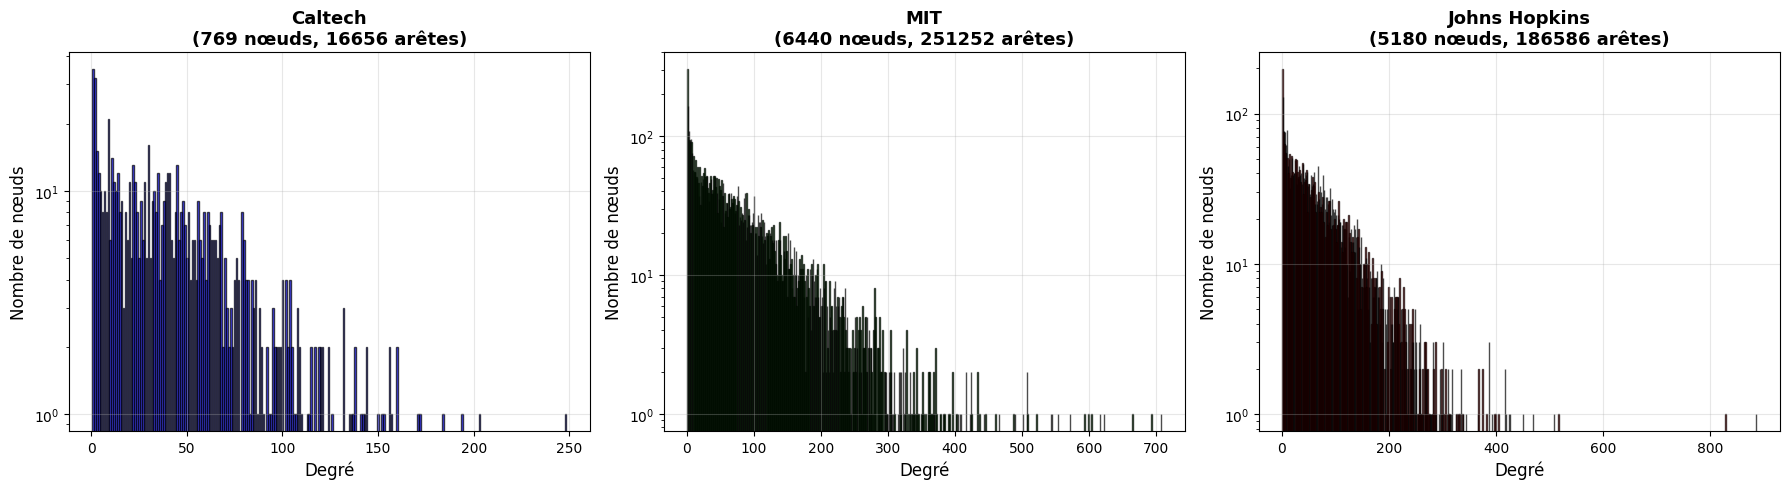

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

networks = [(net1, 'Caltech', 'blue'), (net2, 'MIT', 'green'), (net3, 'Johns Hopkins', 'red')]

for idx, (net, name, color) in enumerate(networks):
    dist = degree_distribution(net)
    degrees = list(dist.keys())
    counts = list(dist.values())
    
    axes[idx].bar(degrees, counts, color=color, alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel('Degré', fontsize=12)
    axes[idx].set_ylabel('Nombre de nœuds', fontsize=12)
    axes[idx].set_title(f'{name}\n({net.number_of_nodes()} nœuds, {net.number_of_edges()} arêtes)', 
                        fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_yscale('log')  # Échelle log pour mieux voir la distribution

plt.tight_layout()
plt.show()

### Conclusion sur les distributions de degré

**Différences notables :**

| Réseau | Nœuds | Arêtes | Degré max | Observation clé |
|--------|-------|--------|-----------|-----------------|
| **Caltech** | 769 | 16,656 | 248 | Petit réseau, distribution classique |
| **MIT** | 6,440 | 251,252 | 708 | Plus grand réseau, plus de hubs intermédiaires |
| **Johns Hopkins** | 5,180 | 186,586 | **886** | Degré maximum exceptionnel, présence de super-hubs |

**Implications :**
1. **Taille et densité** : MIT présente la plus grande population mais Johns Hopkins a le degré maximum le plus élevé (886), suggérant des individus exceptionnellement connectés
2. **Hétérogénéité sociale** : Les variations reflètent des dynamiques sociales différentes selon les campus
3. **Robustesse** : Ces réseaux sont vulnérables à la suppression des hubs mais résilients aux défaillances aléatoires
4. **Modularité** : La distribution suggère une organisation en communautés distinctes au sein de chaque université

Ces distributions confirment les observations de Traud et al. [2,3] sur la structure hétérogène et modulaire des réseaux Facebook universitaires.

### **(b) Global and deep analysis of each network**

Pour mieux mener notre analyse, nous allons dans un premier temps afficher un sous-graphe du graphe principal car le graphe complet est trop grand pour une visualisation claire. Nous allons choisir **le top 400** noeuds connectés de **Caltech** et **le top 400** noeuds connectés de **MIT** et **Johns Hopkins** pour cette visualisation.

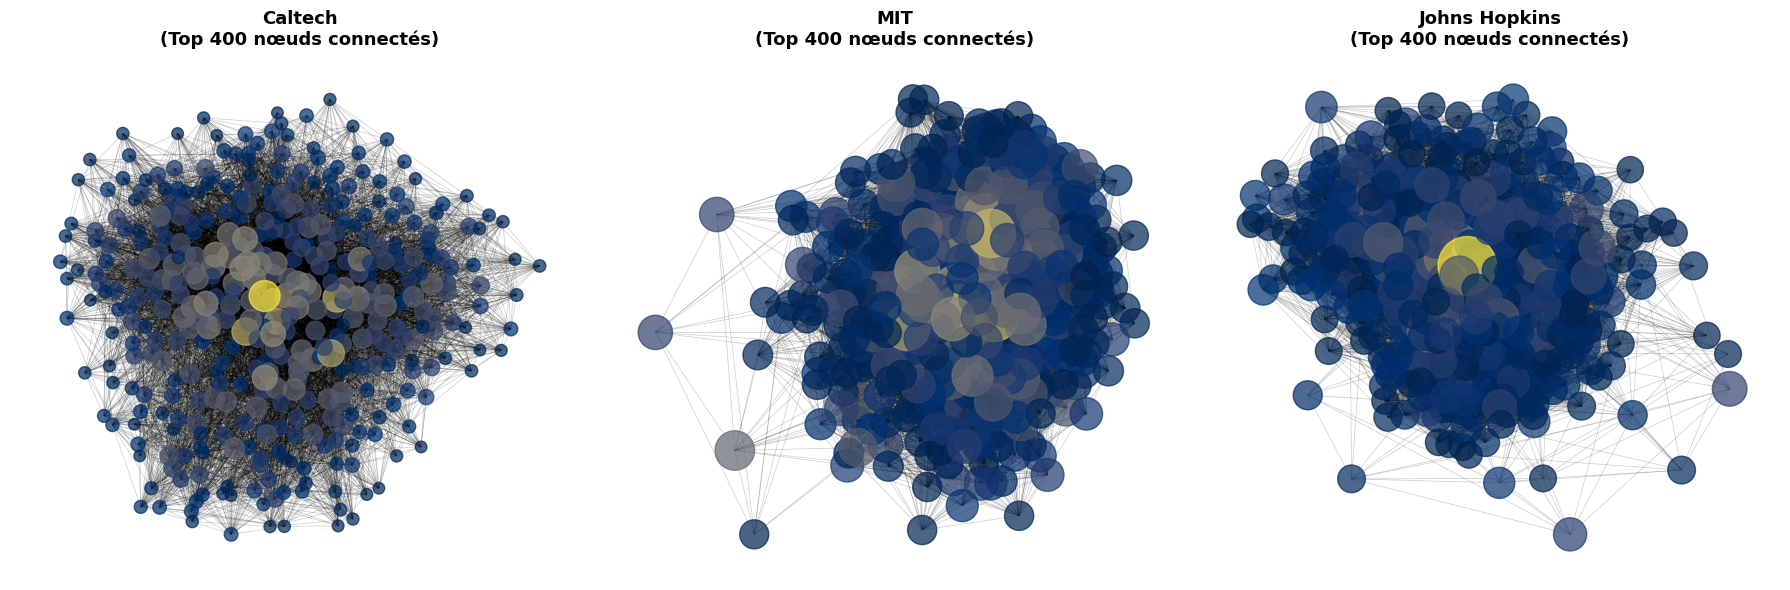

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

networks = [(net1, 'Caltech', 400), (net2, 'MIT', 400), (net3, 'Johns Hopkins', 400)]

for idx, (net, name, sample_size) in enumerate(networks):

    degrees = dict(net.degree())
    top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:sample_size]
    subgraph = net.subgraph(top_nodes)
    
    # Layout spring pour une meilleure visualisation
    pos = nx.spring_layout(subgraph, k=0.5, iterations=50, seed=42)
    
    # Taille des nœuds proportionnelle au degré
    node_sizes = [degrees[node] * 2 for node in subgraph.nodes()]
    
    # Dessiner le graphe
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, 
                          node_color=list(degrees[node] for node in subgraph.nodes()),
                          cmap='cividis', alpha=0.7, ax=axes[idx])
    nx.draw_networkx_edges(subgraph, pos, alpha=0.2, width=0.5, ax=axes[idx])
    
    axes[idx].set_title(f'{name}\n(Top {sample_size} nœuds connectés)', 
                       fontsize=13, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

Ici nous allons implémenter le code qui va nous permettre de repondre a la question 2 (b) en affichant les informations demandées.

In [11]:
def complete_clustering_analysis(G, name="Network"):
    """Compute clustering coefficients and edge density for a network."""
    
    # Clustering metrics
    avg_clustering = nx.average_clustering(G)  # Mean local clustering coefficient
    transitivity = nx.transitivity(G)  # Global clustering coefficient
    
    # Edge density
    n = G.number_of_nodes()
    m = G.number_of_edges()
    max_edges = n * (n - 1) / 2  # For undirected graph
    density = nx.density(G)  # or manually: 2 * m / (n * (n - 1))
    
    return {
        "network": name,
        "nodes": n,
        "edges": m,
        "mean_local_clustering": avg_clustering,
        "global_clustering": transitivity,
        "edge_density": density,
        "is_sparse": density < 0.1  # Common threshold for sparsity
    }

# Analyze all three networks
results = []
for net, name in [(net1, 'Caltech'), (net2, 'MIT'), (net3, 'Johns Hopkins')]:
    results.append(complete_clustering_analysis(net, name))

# Display results
df_analysis = pd.DataFrame(results)
print(df_analysis)

         network  nodes   edges  mean_local_clustering  global_clustering  \
0        Caltech    769   16656               0.409294           0.291283   
1            MIT   6440  251252               0.271219           0.180288   
2  Johns Hopkins   5180  186586               0.268393           0.193161   

   edge_density  is_sparse  
0      0.056404       True  
1      0.012118       True  
2      0.013910       True  


### **(c) Scatter plot of degree vs local clustering coefficient of each network**

Pour cette partie, nous allons tracer un scatter plot du degré versus le coefficient de clustering local pour chaque réseau. Cela nous permettra de visualiser la relation entre la connectivité d'un nœud et son niveau de clustering.

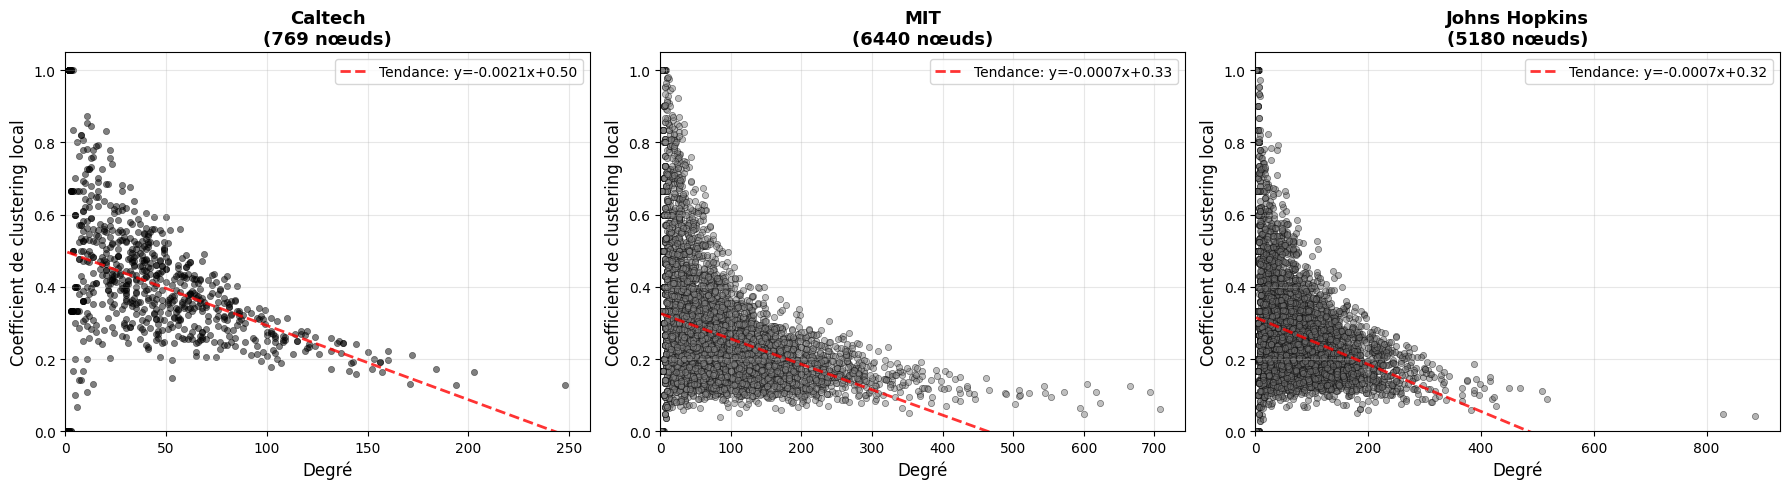

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

networks = [(net1, 'Caltech', 'black'), (net2, 'MIT', 'gray'), (net3, 'Johns Hopkins', 'dimgray')]

for idx, (net, name, color) in enumerate(networks):
    # Calculer les degrés et les coefficients de clustering locaux
    degrees = dict(net.degree())
    clustering = nx.clustering(net)
    
    # Extraire les valeurs pour le scatter plot
    degree_values = [degrees[node] for node in net.nodes()]
    clustering_values = [clustering[node] for node in net.nodes()]
    
    # Créer le scatter plot
    axes[idx].scatter(degree_values, clustering_values, alpha=0.5, s=20, color=color, edgecolors='black', linewidth=0.5)
    axes[idx].set_xlabel('Degré', fontsize=12)
    axes[idx].set_ylabel('Coefficient de clustering local', fontsize=12)
    axes[idx].set_title(f'{name}\n({net.number_of_nodes()} nœuds)', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim(left=0)
    axes[idx].set_ylim([0, 1.05])
    
    # Ajouter une ligne de tendance
    z = np.polyfit(degree_values, clustering_values, 1)
    p = np.poly1d(z)
    x_line = np.linspace(min(degree_values), max(degree_values), 100)
    axes[idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label=f'Tendance: y={z[0]:.4f}x+{z[1]:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

**Sur le plan topologique**, les trois réseaux suivent la même loi de décroissance du clustering avec le degré : $C(k) \propto k^{-\alpha}$. Cependant, l'intensité de cette décroissance varie. Caltech avec une pente de -0.0021 montre une décroissance plus douce, reflétant une communauté plus homogène et intégrée où même les individus bien connectés maintiennent un clustering modéré (0.1-0.3). MIT et Johns Hopkins, avec des pentes beaucoup plus faibles (-0.0007), affichent une structure où les hubs ont un clustering quasi-nul (<0.1), ce qui indique que ces super-connecteurs agissent comme des "ponts" reliant des communautés distinctes sans appartenir pleinement à une seule.

**L'effet de taille campus est crucial** pour comprendre ces différences. Caltech, avec seulement 769 nœuds, forme une petite communauté soudée où tout le monde a tendance à se connaître ou se croiser. MIT, avec 6,440 nœuds et une densité très faible (0.012), crée naturellement des sous-communautés basées sur les départements, les dortoirs ou les clubs. Johns Hopkins, avec 5,180 nœuds, présente un profil intermédiaire mais dominé par un super-hub à 886 connexions qui centralise une grande partie du réseau.

## **Question 3 : Assortativity Analysis with the Facebook100 Dataset**

### **(a) Assortativity analysis**

Dans cette partie, nous allons étudier l'assortativité de plusieurs graphes en fonctions des attribut des nœuds. Cela nous permettra de comprendre si les nœuds avec des attributs similaires ont tendance à se connecter entre eux ou non. Pour cela, nous allons utiliser 5 attributs différents :
- (i) student/faculty status
- (ii) major
- (iii) vertex degree
- (iv) dorm
- (v) gender

Il ne faut pas oublier qu'ici, il est récommandé de prendre les 100 graphes presents dans le dataset car celà permettra une plus mleilleur observation pour finalement en tirer une meilleure conclusion. 

In [17]:
# Juste avoir une idée de à quoi ressemble la composition d'un noeud
print("=== Attributs des nœuds ===")
print(list(net1.nodes(data=True))[None:5:None])

=== Attributs des nœuds ===
[('0', {'student_fac': 1, 'gender': 1, 'major_index': 199, 'second_major': 0, 'dorm': 169, 'year': 2008, 'high_school': 3387}), ('1', {'student_fac': 1, 'gender': 1, 'major_index': 199, 'second_major': 0, 'dorm': 165, 'year': 2006, 'high_school': 3172}), ('2', {'student_fac': 1, 'gender': 2, 'major_index': 201, 'second_major': 0, 'dorm': 171, 'year': 2008, 'high_school': 9773}), ('3', {'student_fac': 2, 'gender': 2, 'major_index': 208, 'second_major': 210, 'dorm': 172, 'year': 2005, 'high_school': 50578}), ('4', {'student_fac': 1, 'gender': 2, 'major_index': 202, 'second_major': 0, 'dorm': 169, 'year': 2008, 'high_school': 11880})]


In [ ]:
def compute_assortativity(G, name):
    """Calcule l'assortativité pour tous les attributs d'un réseau."""
    results = {"network": name, "size": G.number_of_nodes()}
    
    # (i) Student/faculty status
    try:
        results["student_fac"] = nx.attribute_assortativity_coefficient(G, 'student_fac')
    except Exception:
        results["student_fac"] = None
    
    # (ii) Major
    try:
        results["major"] = nx.attribute_assortativity_coefficient(G, 'major_index')
    except Exception:
        results["major"] = None
    
    # (iii) Vertex degree (assortativité numérique)
    try:
        results["degree"] = nx.degree_assortativity_coefficient(G)
    except Exception:
        results["degree"] = None
    
    # (iv) Dorm
    try:
        results["dorm"] = nx.attribute_assortativity_coefficient(G, 'dorm')
    except Exception:
        results["dorm"] = None
    
    # (v) Gender
    try:
        results["gender"] = nx.attribute_assortativity_coefficient(G, 'gender')
    except Exception:
        results["gender"] = None
    
    return results

# Charger tous les graphes FB100 et calculer l'assortativité
assortativity_results = []
data_dir = Path('data')
gml_files = sorted(data_dir.glob('*.gml'))

for gml_path in gml_files:
    try:
        G = nx.read_gml(gml_path)
        assortativity_results.append(compute_assortativity(G, gml_path.stem))
    except Exception as exc:
        print(f"Skip {gml_path.name}: {exc}")

df_assortativity = pd.DataFrame(assortativity_results)
df_assortativity.head()

,network,size,student_fac,major,degree,dorm,gender
0,American75,6386,0.287821,0.045842,0.066022,0.219064,0.025517
1,Amherst41,2235,0.403411,0.042038,0.058428,0.074814,0.047284
2,Auburn71,18448,0.191886,0.039702,0.001046,0.240427,0.078603
3,Baylor93,12803,0.300105,0.044172,0.078730,0.231507,0.079657
4,BC17,11509,0.533181,0.040086,0.076033,0.120566,0.013834


Visualisation de l'assortativité pour tous les graphes (couleur unique, sans labels de réseau).

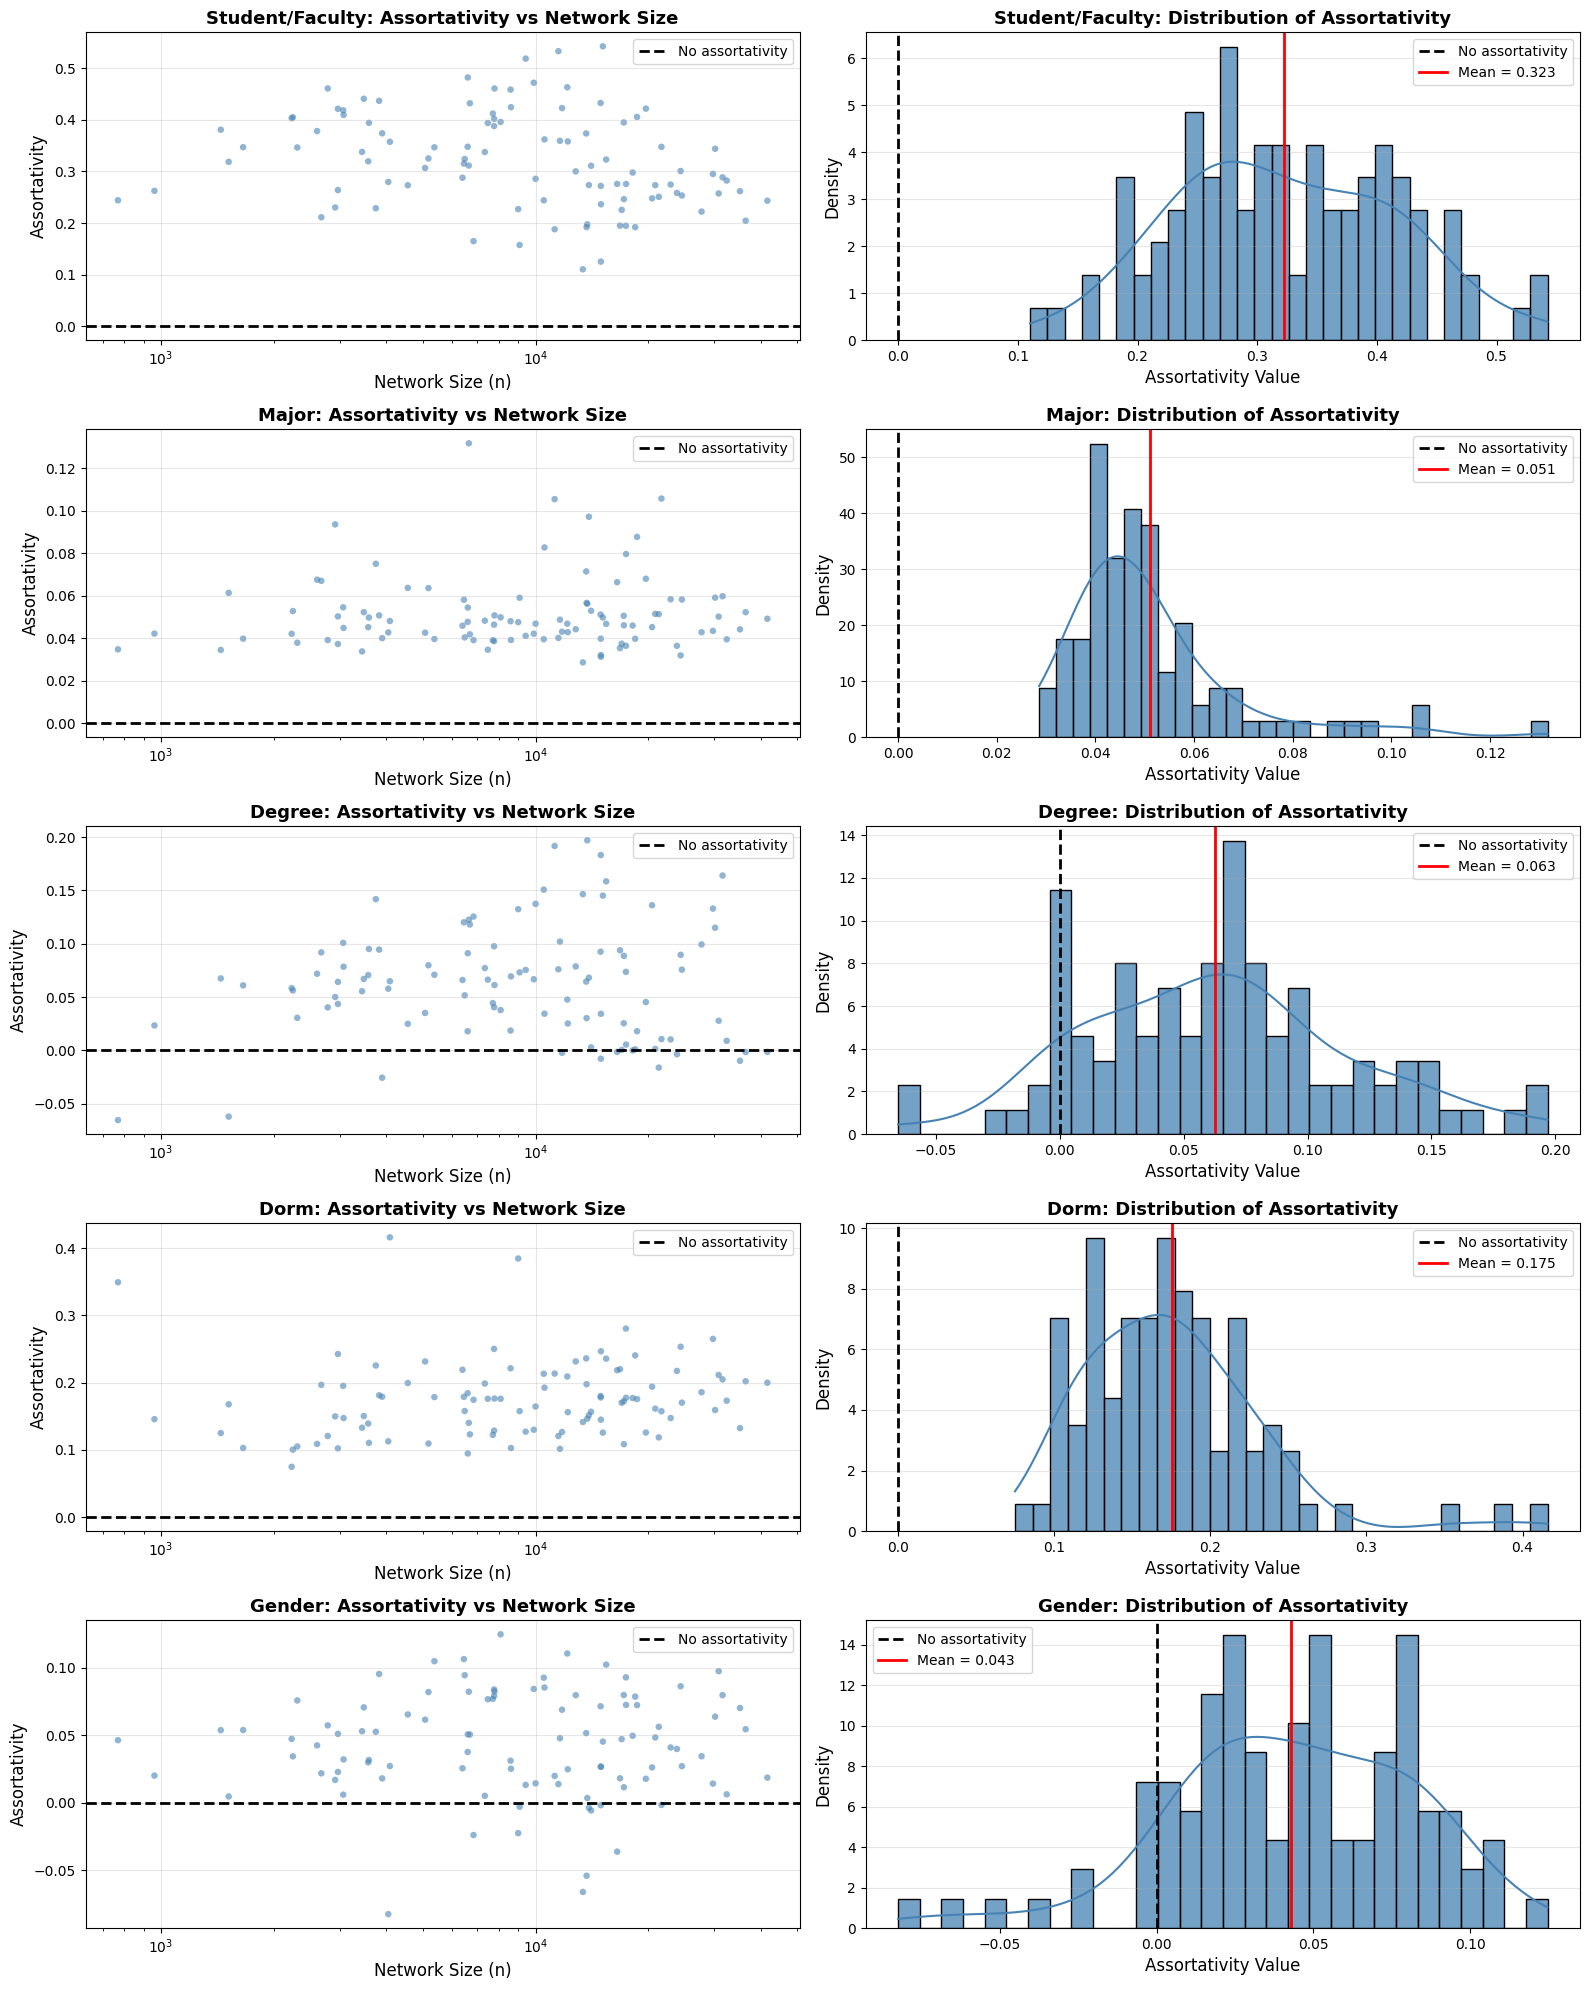

In [17]:
# Visualisation : Assortativity vs Network Size et Distribution (tous les graphes)
import seaborn as sns
attributes = ['student_fac', 'major', 'degree', 'dorm', 'gender']
attribute_names = ['Student/Faculty', 'Major', 'Degree', 'Dorm', 'Gender']

fig, axes = plt.subplots(5, 2, figsize=(16, 20))

for idx, (attr, attr_name) in enumerate(zip(attributes, attribute_names)):
    ax1 = axes[idx, 0]
    sizes = df_assortativity['size'].to_numpy()
    assort_values = df_assortativity[attr].to_numpy()
    mask = ~pd.isna(assort_values)

    # Scatter (couleur unique, sans noms)
    ax1.scatter(sizes[mask], assort_values[mask], s=22, alpha=0.6, color='steelblue', edgecolors='none')
    ax1.axhline(y=0, color='black', linestyle='--', linewidth=2, label='No assortativity')
    ax1.set_xscale('log')
    ax1.set_xlabel('Network Size (n)', fontsize=12)
    ax1.set_ylabel('Assortativity', fontsize=12)
    ax1.set_title(f'{attr_name}: Assortativity vs Network Size', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Histogramme / distribution (KDE lissé, couleur unique, ligne à 0 et moyenne)
    ax2 = axes[idx, 1]
    valid_values = pd.Series(assort_values).dropna()
    if not valid_values.empty:
        sns.histplot(valid_values, bins=30, color='steelblue', kde=True, stat='density', edgecolor='black', alpha=0.75, ax=ax2)
        ax2.axvline(x=0, color='black', linestyle='--', linewidth=2, label='No assortativity')
        ax2.axvline(x=valid_values.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean = {valid_values.mean():.3f}')
        ax2.set_xlabel('Assortativity Value', fontsize=12)
        ax2.set_ylabel('Density', fontsize=12)
        ax2.set_title(f'{attr_name}: Distribution of Assortativity', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        ax2.legend()
    else:
        ax2.text(0.5, 0.5, 'No valid data', ha='center', va='center', fontsize=14)
        ax2.set_title(f'{attr_name}: Distribution of Assortativity', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## **Question 4 : Link prediction**


### **(a) Reading of article**

### **(b) Implementation of links predictors metrics:** *common neighbors*, *jaccard*, *Adamic/Adar*

In [ ]:
from abc import ABC
from abc import abstractmethod
import itertools
import math
import networkx as nx
import numpy as np
import progressbar

class LinkPrediction(ABC):
    def __init__(self, graph):
        """Store the graph reference and its size."""
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        """Return the neighbors list of a node."""
        return list(self.graph.neighbors(v))


class _BaseScorer(LinkPrediction):
    def __init__(self, graph):
        super().__init__(graph)
        # Precompute neighbor sets and degrees for speed
        self._nbrs = {n: set(graph.neighbors(n)) for n in graph.nodes}
        self._deg = dict(graph.degree())

    def _non_edge_iterator(self, sample_size=None):
        pairs = nx.non_edges(self.graph)
        return itertools.islice(pairs, sample_size) if sample_size else pairs

    def _finalize(self, scores, k):
        # Sort by score descending, then by nodes for determinism
        scores.sort(key=lambda x: (-x[2], x[0], x[1]))
        if k:
            scores = scores[:k]
        self.scores_ = scores
        return scores


class CommonNeighbors(_BaseScorer):
    def __init__(self, graph):
        super().__init__(graph)

    def _score_pair(self, u, v):
        return len(self._nbrs[u] & self._nbrs[v])

    def fit(self, k=None, sample_size=None):
        scores = []
        for u, v in self._non_edge_iterator(sample_size):
            s = self._score_pair(u, v)
            scores.append((u, v, s))
        return self._finalize(scores, k)


class Jaccard(_BaseScorer):
    def __init__(self, graph):
        super().__init__(graph)

    def _score_pair(self, u, v):
        inter = self._nbrs[u] & self._nbrs[v]
        union = self._nbrs[u] | self._nbrs[v]
        return len(inter) / len(union) if union else 0.0

    def fit(self, k=None, sample_size=None):
        scores = []
        for u, v in self._non_edge_iterator(sample_size):
            s = self._score_pair(u, v)
            scores.append((u, v, s))
        return self._finalize(scores, k)


class AdamicAdar(_BaseScorer):
    def __init__(self, graph):
        super().__init__(graph)

    def _score_pair(self, u, v):
        inter = self._nbrs[u] & self._nbrs[v]
        score = 0.0
        for w in inter:
            dw = self._deg.get(w, 0)
            if dw > 1:
                score += 1.0 / math.log(dw)
        return score

    def fit(self, k=None, sample_size=None):
        scores = []
        for u, v in self._non_edge_iterator(sample_size):
            s = self._score_pair(u, v)
            scores.append((u, v, s))
        return self._finalize(scores, k)


### **(c) Evaluation of links predictors**

Dans cette partie, comme specifié dans le sujet du projet, nous allons implémenter trois prédicteurs de liens basés sur des mesures de similarité locale : Common Neighbors, Jaccard Coefficient et Adamic/Adar Index. Nous allons évaluer leurs performances sur le dataset Facebook100 en prenant un ensemble de graphe supérieur à 10 comme le sujet l'indique, on ne prendra pas énormement non plus pour cause de gpu et pour ne pas que cela met du temps. Nous allons donc prendre 15 graphes. On va faire tout cela en suivant la procédure décrite.

Procédure (énoncé) :
1) Choisir un graphe FB100 `G_fb(V, E)`.
2) Retirer aléatoirement une fraction f ∈ {0.05, 0.10, 0.15, 0.20} des arêtes → `E_removed`.
3) Pour chaque paire de nœuds (non-arête dans le graphe amputé), calculer le score du prédicteur `p` (Common Neighbors, Jaccard, Adamic/Adar) pour obtenir `E_predict`.
4) Trier les paires par score décroissant et prendre les k meilleurs `E_predict_top@k` (k = 50, 100, 200, 300, 400).
5) Mesurer |E_removed ∩ E_predict_top@k| puis calculer top@k, precision@k, recall@k. (top@k = % de vrais positifs dans le top-k).

In [22]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm


def holdout_split(G, frac, seed=42):
    """Retire aléatoirement une fraction d'arêtes et retourne (G_train, edges_removed, rng)."""
    rng = np.random.default_rng(seed)
    edges = list(G.edges())
    m = max(1, int(len(edges) * frac))
    idx = rng.choice(len(edges), size=m, replace=False)
    edges_removed = [edges[i] for i in idx]
    G_train = G.copy()
    G_train.remove_edges_from(edges_removed)
    return G_train, edges_removed, rng


def evaluate_predictor(G, predictor_cls, frac_list, ks=(50, 100, 200, 300, 400), seed=42, negative_sample_size=None):
    """Évalue un prédicteur sur un graphe avec AUC et top/precision/recall@k."""
    rows = []
    for frac in frac_list:
        G_train, removed, rng = holdout_split(G, frac, seed=seed)
        predictor = predictor_cls(G_train)

        # Itérer sur les non-arêtes (échantillonnage si demandé)
        non_edges_iter = nx.non_edges(G_train)
        if negative_sample_size:
            non_edges_iter = itertools.islice(non_edges_iter, negative_sample_size)

        scores = []
        for u, v in non_edges_iter:
            s = predictor._score_pair(u, v)
            scores.append((u, v, s))
        scores.sort(key=lambda x: (-x[2], x[0], x[1]))

        removed_set = {tuple(sorted(e)) for e in removed}
        pos_scores = [s for u, v, s in scores if (min(u, v), max(u, v)) in removed_set]
        neg_scores = [s for u, v, s in scores if (min(u, v), max(u, v)) not in removed_set]
        auc = roc_auc_score([1] * len(pos_scores) + [0] * len(neg_scores), pos_scores + neg_scores) if pos_scores and neg_scores else np.nan

        for k in ks:
            k_eff = min(k, len(scores))
            topk = scores[:k_eff]
            tp = sum((min(u, v), max(u, v)) in removed_set for u, v, _ in topk)
            fp = k_eff - tp
            fn = len(removed) - tp

            rows.append({
                "predictor": predictor_cls.__name__,
                "frac_removed": frac,
                "k": k,
                "edges_removed": len(removed),
                "auc": auc,
                "top@k": tp / k_eff if k_eff else np.nan,
                "precision@k": tp / (tp + fp) if (tp + fp) else np.nan,
                "recall@k": tp / (tp + fn) if (tp + fn) else np.nan,
                "tp": tp, "fp": fp, "fn": fn,
            })
    return pd.DataFrame(rows)


# Exemple : évaluation sur un graphe FB100 avec les trois prédicteurs
#G_fb = nx.read_gml('data/Caltech36.gml')
fractions = [0.05, 0.10, 0.15, 0.20]

predictors = [CommonNeighbors, Jaccard, AdamicAdar]
gml_files = sorted(Path("data").glob("*.gml"))[:15]  # 15 graphes

dfs = []
for gml in tqdm(gml_files, desc="Graphs"):
    G = nx.read_gml(gml)
    for pred in predictors:
        df = evaluate_predictor(G, pred, fractions, ks=(50, 100, 200, 300, 400), seed=42, negative_sample_size=200_000)
        df["graph"] = gml.stem
        dfs.append(df)

results_many = pd.concat(dfs, ignore_index=True)
display(results_many.head())


Graphs:   0%|          | 0/15 [00:00<?, ?it/s]

Graphs: 100%|██████████| 15/15 [14:24<00:00, 57.65s/it]


,predictor,frac_removed,k,edges_removed,auc,top@k,precision@k,recall@k,tp,fp,fn,graph
0,CommonNeighbors,0.05,50,10883,0.944485,0.260000,0.260000,0.001195,13,37,10870,American75
1,CommonNeighbors,0.05,100,10883,0.944485,0.150000,0.150000,0.001378,15,85,10868,American75
2,CommonNeighbors,0.05,200,10883,0.944485,0.085000,0.085000,0.001562,17,183,10866,American75
3,CommonNeighbors,0.05,300,10883,0.944485,0.063333,0.063333,0.001746,19,281,10864,American75
4,CommonNeighbors,0.05,400,10883,0.944485,0.057500,0.057500,0.002113,23,377,10860,American75


In [29]:
results_many.groupby(['graph', 'predictor'])['auc'].count().unstack().fillna(0)
prec_k = results_many.groupby(['predictor', 'k'])['precision@k'].mean().unstack()
prec_k

k,50,100,200,300,400
predictor,,,,,
AdamicAdar,0.460000,0.365167,0.277417,0.232889,0.204792
CommonNeighbors,0.437333,0.351667,0.266083,0.221333,0.196500
Jaccard,0.412667,0.353000,0.279250,0.240722,0.214833


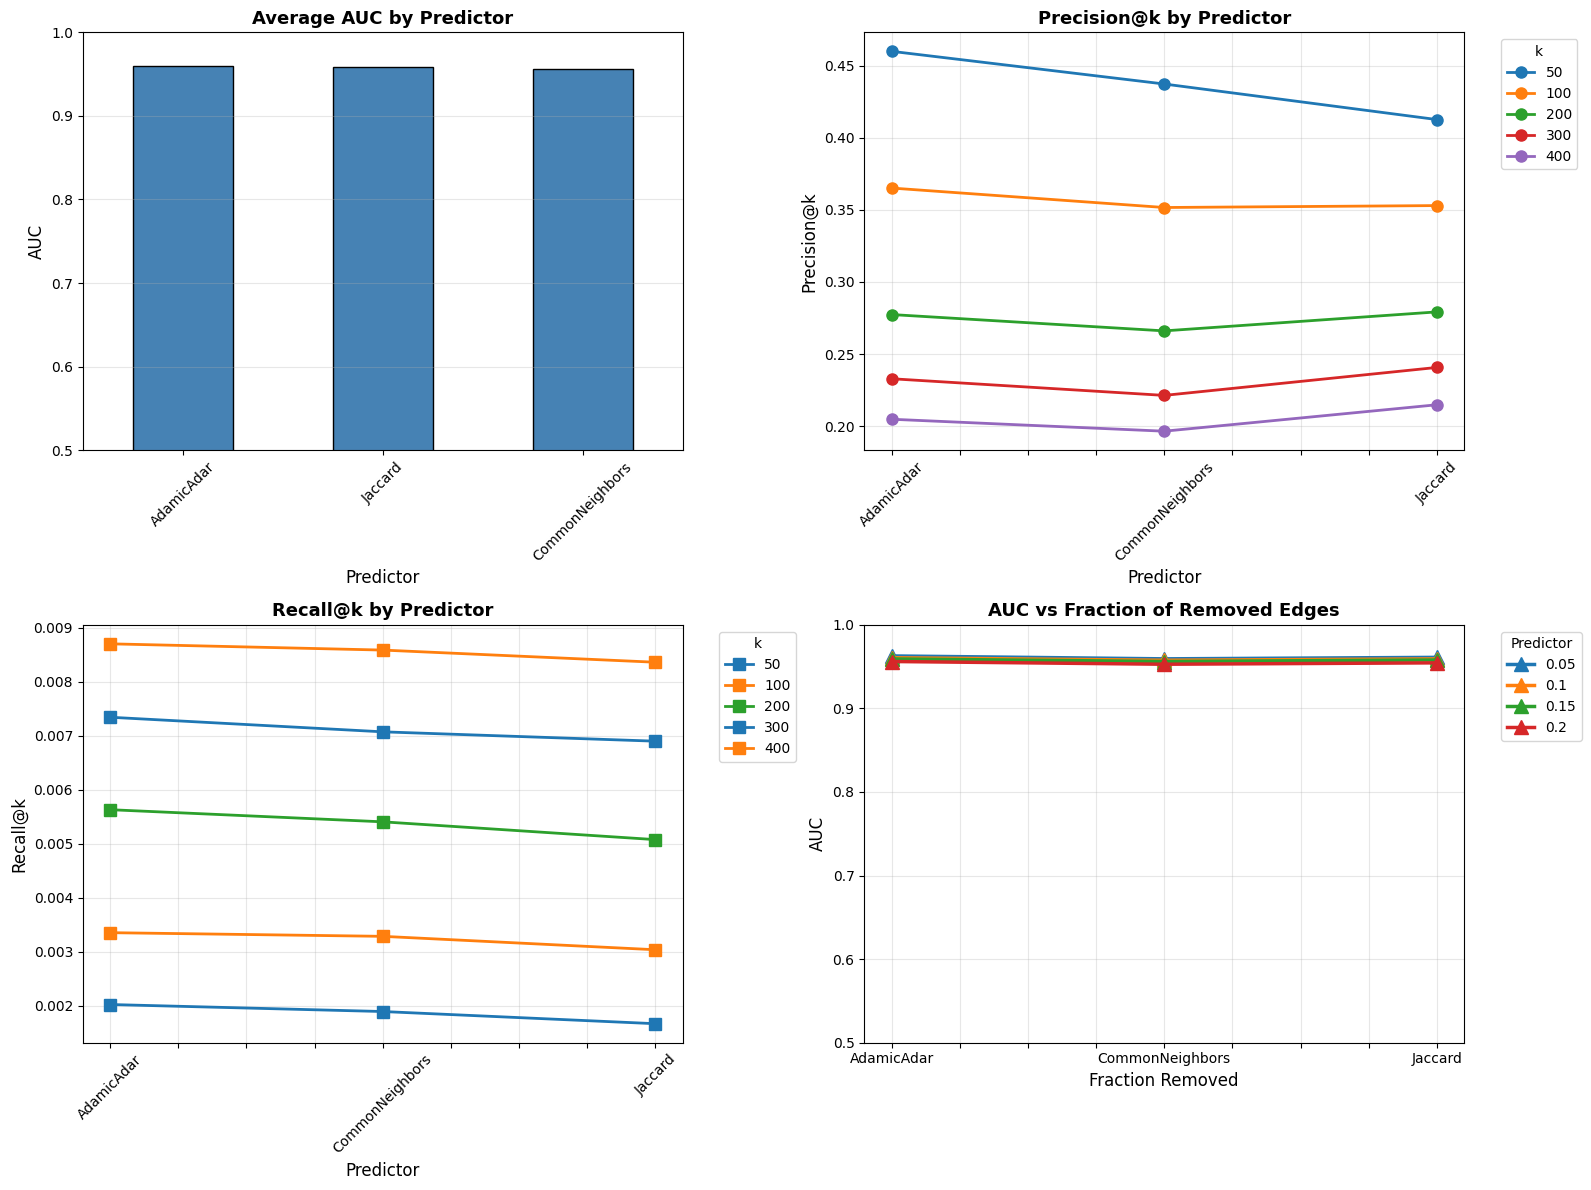

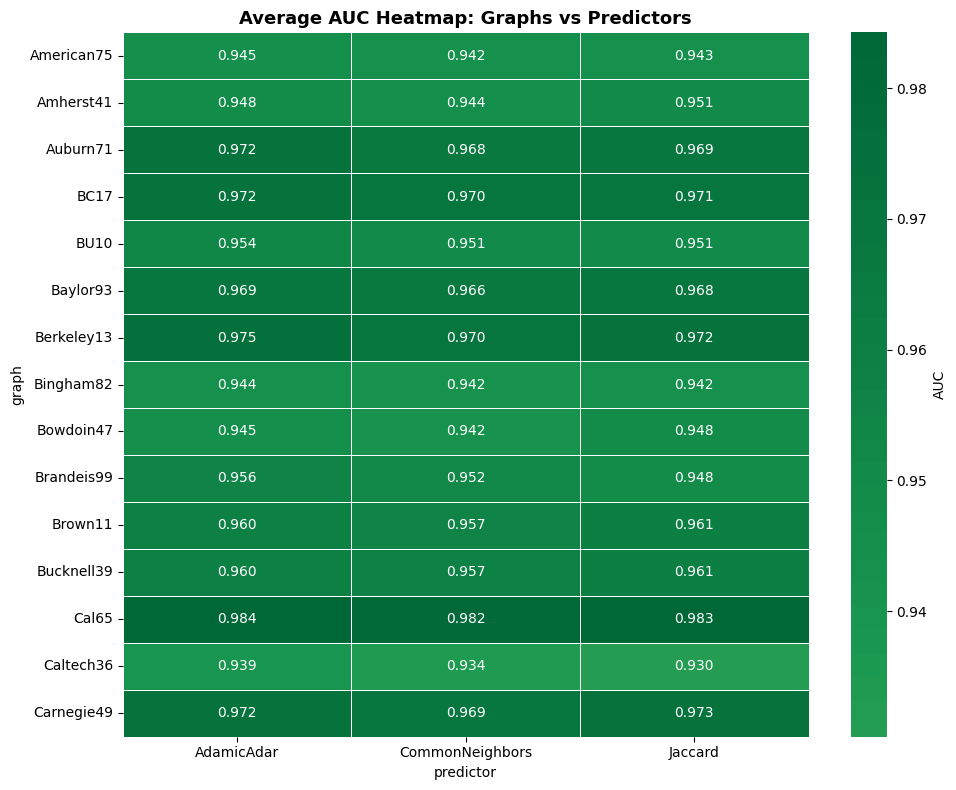

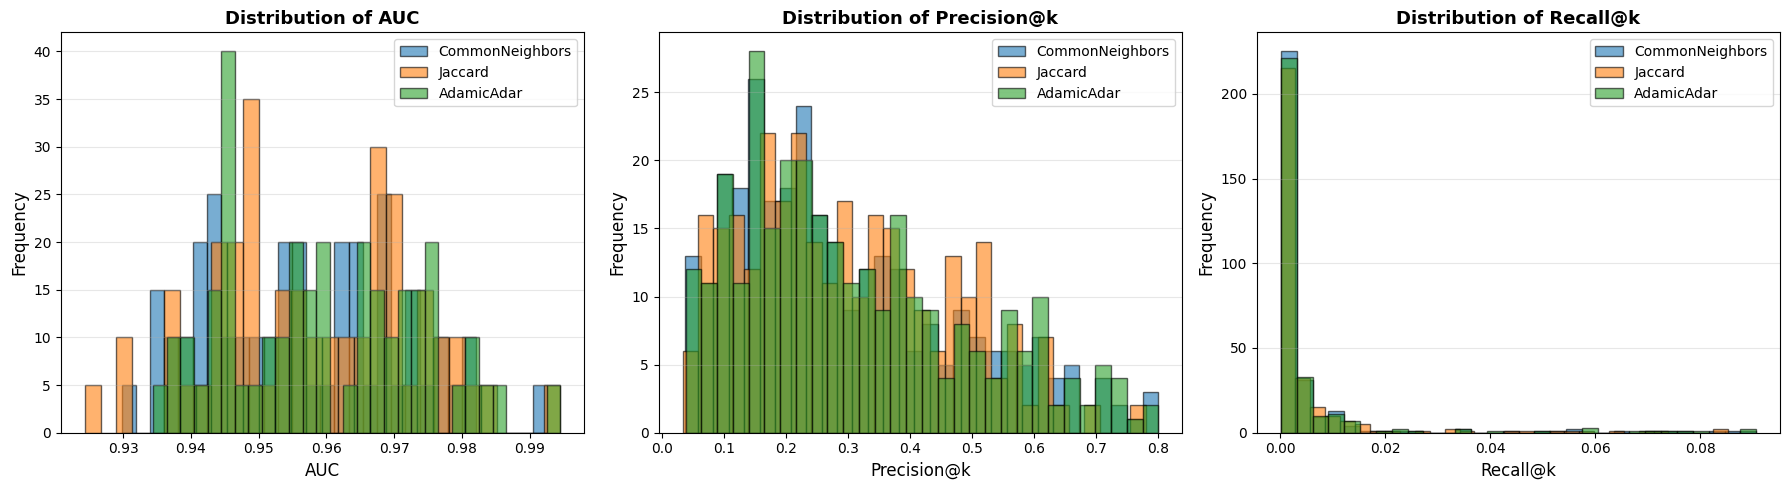


=== Link Prediction Performance Summary ===

                    auc         precision@k         recall@k           top@k  \
                   mean     std        mean     std     mean     std    mean   
predictor                                                                      
AdamicAdar       0.9597  0.0142      0.3081  0.1843   0.0054  0.0139  0.3081   
CommonNeighbors  0.9565  0.0143      0.2946  0.1810   0.0052  0.0137  0.2946   
Jaccard          0.9582  0.0148      0.3001  0.1638   0.0050  0.0122  0.3001   

                         
                    std  
predictor                
AdamicAdar       0.1843  
CommonNeighbors  0.1810  
Jaccard          0.1638  


In [28]:
results_many.groupby(['graph', 'predictor'])['auc'].count().unstack().fillna(0)

# Visualisation 1 : AUC moyen par prédicteur
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) AUC by predictor
ax = axes[0, 0]
auc_by_pred = results_many.groupby('predictor')['auc'].mean().sort_values(ascending=False)
auc_by_pred.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Average AUC by Predictor', fontsize=13, fontweight='bold')
ax.set_ylabel('AUC', fontsize=12)
ax.set_xlabel('Predictor', fontsize=12)
ax.set_ylim([0.5, 1.0])
ax.grid(True, alpha=0.3, axis='y')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# (2) Precision@k by predictor and k
ax = axes[0, 1]
prec_k = results_many.groupby(['predictor', 'k'])['precision@k'].mean().unstack()
prec_k.plot(ax=ax, marker='o', linewidth=2, markersize=8)
ax.set_title('Precision@k by Predictor', fontsize=13, fontweight='bold')
ax.set_ylabel('Precision@k', fontsize=12)
ax.set_xlabel('Predictor', fontsize=12)
ax.legend(title='k', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# (3) Recall@k by predictor and k
ax = axes[1, 0]
recall_k = results_many.groupby(['predictor', 'k'])['recall@k'].mean().unstack()
recall_k.plot(ax=ax, marker='s', linewidth=2, markersize=8, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title('Recall@k by Predictor', fontsize=13, fontweight='bold')
ax.set_ylabel('Recall@k', fontsize=12)
ax.set_xlabel('Predictor', fontsize=12)
ax.legend(title='k', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# (4) AUC vs Fraction Removed
ax = axes[1, 1]
frac_auc = results_many.groupby(['predictor', 'frac_removed'])['auc'].mean().unstack()
frac_auc.plot(ax=ax, marker='^', linewidth=2.5, markersize=10)
ax.set_title('AUC vs Fraction of Removed Edges', fontsize=13, fontweight='bold')
ax.set_ylabel('AUC', fontsize=12)
ax.set_xlabel('Fraction Removed', fontsize=12)
ax.legend(title='Predictor', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim([0.5, 1.0])

plt.tight_layout()
plt.show()

# Visualisation 2 : Heatmap AUC par graphe et prédicteur
fig, ax = plt.subplots(figsize=(10, 8))
auc_pivot = results_many.pivot_table(values='auc', index='graph', columns='predictor', aggfunc='mean')
sns.heatmap(auc_pivot, annot=True, fmt='.3f', cmap='RdYlGn', center=0.75, 
            cbar_kws={'label': 'AUC'}, ax=ax, linewidths=0.5)
ax.set_title('Average AUC Heatmap: Graphs vs Predictors', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualisation 3 : Distribution des métriques par prédicteur
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['auc', 'precision@k', 'recall@k']
metric_names = ['AUC', 'Precision@k', 'Recall@k']

for idx, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax = axes[idx]
    for pred in results_many['predictor'].unique():
        data = results_many[results_many['predictor'] == pred][metric].dropna()
        ax.hist(data, bins=30, alpha=0.6, label=pred, edgecolor='black')
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Distribution of {name}', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Visualisation 4 : Performance summary table
summary = results_many.groupby('predictor').agg({
    'auc': ['mean', 'std'],
    'precision@k': ['mean', 'std'],
    'recall@k': ['mean', 'std'],
    'top@k': ['mean', 'std']
}).round(4)

print("\n=== Link Prediction Performance Summary ===\n")
print(summary)

### **(d) Test and evaluation on a couple of graphs in the facebook100 dataset**

ANALYSE COMPARATIVE : Efficacité des métriques de link prediction

Graphes analysés : ['Berkeley13', 'Caltech36']
Nombre d'observations : 120

TABLEAU 1 : Statistiques globales (moyenne sur tous les graphes et paramètres)
                    auc         precision@k         recall@k           top@k  \
                   mean     std        mean     std     mean     std    mean   
predictor                                                                      
AdamicAdar       0.9570  0.0194      0.3310  0.2351   0.0252  0.0311  0.3310   
CommonNeighbors  0.9521  0.0194      0.3245  0.2367   0.0248  0.0307  0.3245   
Jaccard          0.9510  0.0221      0.2562  0.1751   0.0213  0.0275  0.2562   

                         
                    std  
predictor                
AdamicAdar       0.2351  
CommonNeighbors  0.2367  
Jaccard          0.1751  

TABLEAU 2 : AUC moyen par graphe et prédicteur
predictor   AdamicAdar  CommonNeighbors  Jaccard
graph                                       

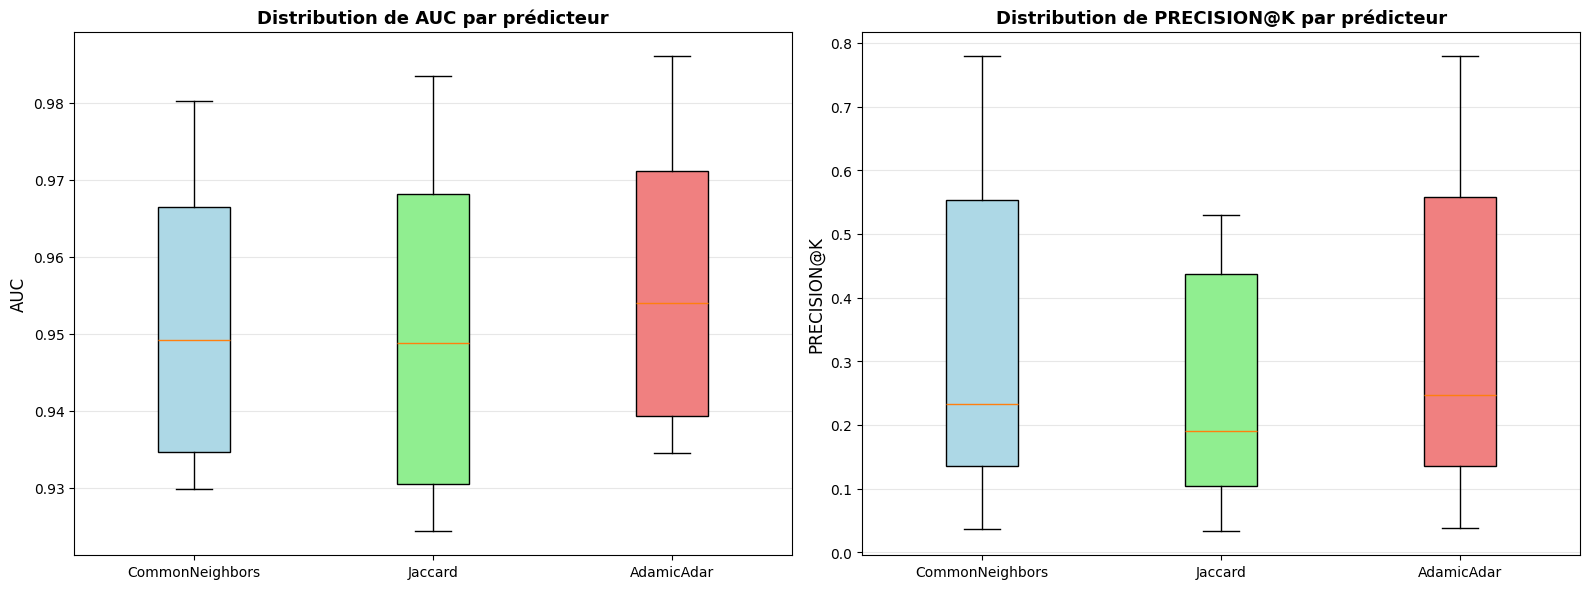

In [ ]:
# Sélection de 5 graphes représentatifs : petits, moyens, grands
selected_graphs = ['Caltech36', 'MIT8', 'Berkeley13', 'Stanford3', 'Yale4']
selected_graphs_data = [g for g in results_many['graph'].unique() if g in selected_graphs][:5]

# Filtrer les résultats pour ces graphes
results_selected = results_many[results_many['graph'].isin(selected_graphs_data)].copy()

print("=" * 80)
print("ANALYSE COMPARATIVE : Efficacité des métriques de link prediction")
print("=" * 80)
print(f"\nGraphes analysés : {selected_graphs_data}")
print(f"Nombre d'observations : {len(results_selected)}")

# --- TABLEAU 1 : Statistiques globales par prédicteur ---
print("\n" + "=" * 80)
print("TABLEAU 1 : Statistiques globales (moyenne sur tous les graphes et paramètres)")
print("=" * 80)

global_stats = results_selected.groupby('predictor').agg({
    'auc': ['mean', 'std'],
    'precision@k': ['mean', 'std'],
    'recall@k': ['mean', 'std'],
    'top@k': ['mean', 'std'],
}).round(4)

print(global_stats)

# --- TABLEAU 2 : Comparaison par graphe ---
print("\n" + "=" * 80)
print("TABLEAU 2 : AUC moyen par graphe et prédicteur")
print("=" * 80)

auc_by_graph = results_selected.pivot_table(
    values='auc', 
    index='graph', 
    columns='predictor', 
    aggfunc='mean'
).round(4)

print(auc_by_graph)
print(f"\nMeilleur prédicteur par graphe :")
for graph in auc_by_graph.index:
    best_pred = auc_by_graph.loc[graph].idxmax()
    best_auc = auc_by_graph.loc[graph].max()
    print(f"  {graph:20s} → {best_pred:20s} (AUC = {best_auc:.4f})")

# --- TABLEAU 3 : Performance à différentes valeurs de k ---
print("\n" + "=" * 80)
print("TABLEAU 3 : Precision@k moyenne par prédicteur")
print("=" * 80)

prec_by_k = results_selected.groupby(['predictor', 'k'])['precision@k'].mean().unstack().round(4)
print(prec_by_k)

# --- TABLEAU 4 : Impact de la fraction d'arêtes retirées ---
print("\n" + "=" * 80)
print("TABLEAU 4 : AUC vs Fraction d'arêtes retirées")
print("=" * 80)

auc_by_frac = results_selected.pivot_table(
    values='auc',
    index='predictor',
    columns='frac_removed',
    aggfunc='mean'
).round(4)

print(auc_by_frac)

# --- VISUALISATION : Box plots comparatifs ---
metrics_display = ['auc', 'precision@k']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
predictors_list = results_selected['predictor'].unique()

for idx, metric in enumerate(metrics_display):
    ax = axes[idx]
    data_by_pred = [results_selected[results_selected['predictor'] == p][metric].dropna().values 
                    for p in predictors_list]
    bp = ax.boxplot(data_by_pred, labels=predictors_list, patch_artist=True)
    
    # Colorer les boîtes
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(metric.upper(), fontsize=12)
    ax.set_title(f'Distribution de {metric.upper()} par prédicteur', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## **Question 5 : Find missing labels with the label propagation algorithms**

### **(a) Reading of article**

### **(b) Implementation of the label propagation algorithm**

En cours, on a vu deux algorithmes de propagation de labels : **Label Propagation Algorithm (LPA)** pour la detection de communautés et **Label Propagation Algorithm for Node Classification (semi-supervised)**. Ces deux algorithmes partagent le principe fondamental de diffusion de l'information à travers les arêtes du graphe, mais ils diffèrent dans leurs objectifs et mécanismes spécifiques. En se basant sur l'énoncé de la question 5 "*Find missing labels with the label propagation algorithms*", l'algorithme le plus approprié est le **Label Propagation Algorithm for Node Classification (semi-supervised)** et aussi l'article lu dans la question 5 (a) le confirme.

In [18]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

class LabelPropagation:
    """
    Semi-supervised Label Propagation pour la classification de nœuds.
    Basé sur l'article [6] Bhagat, Cormode & Muthukrishnan (2011).
    
    Algorithme: Y^(t+1) = α * S * Y^(t) + (1-α) * Y_0
    où S est la matrice de transition normalisée par degré.
    """
    
    def __init__(self, alpha=0.99, max_iter=100, tol=1e-6, device='cpu'):
        """
        Parameters:
        -----------
        alpha : float (0 < α < 1)
            Paramètre de diffusion. α proche de 1 = forte propagation.
        max_iter : int
            Nombre maximum d'itérations
        tol : float
            Seuil de convergence (différence entre Y^t et Y^(t+1))
        device : str
            'cpu' ou 'cuda' pour PyTorch
        """
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.device = torch.device(device)
        
        # Variables à stocker après fit
        self.Y_final = None
        self.node_to_idx = None
        self.label_encoder = None
        self.num_classes = None
        
    def _build_transition_matrix(self, G):
        """
        Construit la matrice de transition S normalisée par degré.
        S[i,j] = A[i,j] / deg(i) si deg(i) > 0
        """
        n = len(G.nodes())
        node_list = list(G.nodes())
        self.node_to_idx = {node: idx for idx, node in enumerate(node_list)}
        
        # Construire matrice d'adjacence
        A = torch.zeros((n, n), dtype=torch.float32, device=self.device)
        for u, v in G.edges():
            i, j = self.node_to_idx[u], self.node_to_idx[v]
            A[i, j] = 1.0
            A[j, i] = 1.0  # Graphe non-dirigé
        
        # Normalisation par degré: S = D^(-1) * A
        degrees = A.sum(dim=1)
        degrees[degrees == 0] = 1.0  # Éviter division par zéro
        D_inv = torch.diag(1.0 / degrees)
        S = torch.mm(D_inv, A)
        
        return S
    
    def fit(self, G, labeled_nodes, labels_dict, attribute='gender'):
        """
        Entraîne le modèle de propagation de labels.
        
        Parameters:
        -----------
        G : nx.Graph
            Graphe NetworkX
        labeled_nodes : list
            Liste des nœuds avec labels connus
        labels_dict : dict
            {node: label} pour les nœuds étiquetés
        attribute : str
            Nom de l'attribut à prédire (pour référence)
        
        Returns:
        --------
        self : LabelPropagation
        """
        n = len(G.nodes())
        node_list = list(G.nodes())
        
        # Encoder les labels
        self.label_encoder = LabelEncoder()
        all_labels = list(labels_dict.values())
        self.label_encoder.fit(all_labels)
        self.num_classes = len(self.label_encoder.classes_)
        
        # Construire matrice de transition
        S = self._build_transition_matrix(G)
        
        # Initialiser Y (matrice de probabilités)
        Y = torch.zeros((n, self.num_classes), dtype=torch.float32, device=self.device)
        Y_init = Y.clone()
        
        # Masque des nœuds étiquetés
        labeled_mask = torch.zeros(n, dtype=torch.bool, device=self.device)
        
        for node in labeled_nodes:
            if node in self.node_to_idx and node in labels_dict:
                idx = self.node_to_idx[node]
                label = labels_dict[node]
                label_idx = self.label_encoder.transform([label])[0]
                Y[idx, label_idx] = 1.0
                Y_init[idx, label_idx] = 1.0
                labeled_mask[idx] = True
        
        # Itération de propagation
        for iteration in range(self.max_iter):
            Y_old = Y.clone()
            
            # Y^(t+1) = α * S * Y^(t) + (1-α) * Y_0
            Y = self.alpha * torch.mm(S, Y) + (1 - self.alpha) * Y_init
            
            # Fixer les labels connus (clamping)
            Y[labeled_mask] = Y_init[labeled_mask]
            
            # Vérifier convergence
            diff = torch.norm(Y - Y_old).item()
            if diff < self.tol:
                print(f"Convergence atteinte à l'itération {iteration + 1} (diff={diff:.6f})")
                break
        
        self.Y_final = Y
        return self
    
    def predict(self, nodes=None):
        """
        Prédit les labels des nœuds.
        
        Parameters:
        -----------
        nodes : list, optional
            Liste des nœuds à prédire. Si None, prédit tous les nœuds.
        
        Returns:
        --------
        predictions : dict
            {node: predicted_label}
        """
        if self.Y_final is None:
            raise ValueError("Le modèle n'a pas été entraîné. Appelez fit() d'abord.")
        
        predictions = {}
        
        if nodes is None:
            nodes = list(self.node_to_idx.keys())
        
        for node in nodes:
            if node in self.node_to_idx:
                idx = self.node_to_idx[node]
                label_idx = torch.argmax(self.Y_final[idx]).item()
                predicted_label = self.label_encoder.inverse_transform([label_idx])[0]
                predictions[node] = predicted_label
        
        return predictions



### **(c) Test our implementation on a network from The Facebook100 dataset**

Dans cette partie, nous allons tester notre implémentation de l'algorithme de propagation de labels pour la classification de nœuds sur un graphe du dataset Facebook100. Comme indiqué nous allons choisir 10%, 20% et 30% des nœuds pour lesquels nous allons masquer les labels et essayer de les prédire en utilisant l'algorithme de propagation de labels et allons perfoermer sur les attributs suivants : *dorm*, *major* et *gender*

In [21]:
def evaluate_label_propagation(G, attribute='gender', mask_ratio=0.5, alpha=0.99, seed=42):
    """
    Évalue Label Propagation sur un graphe avec masquage aléatoire de labels.
    
    Parameters:
    -----------
    G : nx.Graph
        Graphe NetworkX avec attributs de nœuds
    attribute : str
        Attribut à prédire ('gender', 'major_index', 'dorm', etc.)
    mask_ratio : float
        Fraction de labels à masquer (entre 0 et 1)
    alpha : float
        Paramètre de diffusion
    seed : int
        Graine aléatoire pour reproductibilité
    
    Returns:
    --------
    results : dict
        Dictionnaire avec accuracy, f1_macro, f1_micro, etc.
    """
    np.random.seed(seed)
    
    # Collecter tous les nœuds avec l'attribut
    nodes_with_attr = []
    true_labels = {}
    
    for node in G.nodes():
        node_data = G.nodes[node]
        if attribute in node_data and node_data[attribute] not in [0, '0', None, 'Unknown']:
            nodes_with_attr.append(node)
            true_labels[node] = node_data[attribute]
    
    if len(nodes_with_attr) < 10:
        return None  # Pas assez de données
    
    # Séparer en train/test
    n_test = max(1, int(len(nodes_with_attr) * mask_ratio))
    test_nodes = np.random.choice(nodes_with_attr, size=n_test, replace=False).tolist()
    train_nodes = [n for n in nodes_with_attr if n not in test_nodes]
    
    if len(train_nodes) < 2:
        return None
    
    # Labels d'entraînement
    train_labels = {n: true_labels[n] for n in train_nodes}
    
    # Entraîner Label Propagation
    lp = LabelPropagation(alpha=alpha, max_iter=100, tol=1e-6, device='cpu')
    lp.fit(G, train_nodes, train_labels, attribute=attribute)
    
    # Prédire sur test
    predictions = lp.predict(test_nodes)
    
    # Évaluation
    y_true = [true_labels[n] for n in test_nodes if n in predictions]
    y_pred = [predictions[n] for n in test_nodes if n in predictions]
    
    if len(y_true) == 0:
        return None
    
    # Encoder pour métriques sklearn
    le = LabelEncoder()
    le.fit(y_true + y_pred)
    y_true_enc = le.transform(y_true)
    y_pred_enc = le.transform(y_pred)
    
    accuracy = accuracy_score(y_true_enc, y_pred_enc)
    f1_macro = f1_score(y_true_enc, y_pred_enc, average='macro', zero_division=0)
    f1_micro = f1_score(y_true_enc, y_pred_enc, average='micro', zero_division=0)
    
    return {
        'graph': G.graph.get('name', 'Unknown'),
        'attribute': attribute,
        'n_nodes': G.number_of_nodes(),
        'n_labeled': len(nodes_with_attr),
        'n_train': len(train_nodes),
        'n_test': len(test_nodes),
        'mask_ratio': mask_ratio,
        'alpha': alpha,
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'n_classes': len(le.classes_)
    }

In [22]:
# Chargement du network de Duke pour illustrer l'exemple dans le sujet
G = nx.read_gml('data/Duke14.gml')
attributes_to_test = ['major_index', 'dorm', 'year', 'gender']
mask_ratios = [0.1, 0.2, 0.3, 0.4]  # Masquer 10%, 20%, 30% et 40% des labels

results_lp = []

#G = nx.read_gml(gml_path)
#G.graph['name'] = gml_path.stem

for attr in attributes_to_test:
    for mask_ratio in mask_ratios:
        try:
            result = evaluate_label_propagation(
                G, 
                attribute=attr, 
                mask_ratio=mask_ratio, 
                alpha=0.99, 
                seed=42
            )
            if result is not None:
                results_lp.append(result)
        except Exception as e:
            print(f"Erreur sur {gml_path.stem} - {attr} ({mask_ratio}): {e}")
            

df_lp = pd.DataFrame(results_lp)
print(f"\n✓ Évaluation terminée sur {len(df_lp)} configurations")
display(df_lp)

Convergence atteinte à l'itération 36 (diff=0.000001)
Convergence atteinte à l'itération 59 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 82 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)

✓ Évaluation terminée sur 16 configurations


Convergence atteinte à l'itération 36 (diff=0.000001)
Convergence atteinte à l'itération 59 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 82 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 80 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)

✓ Évaluation terminée sur 16 configurations


,graph,attribute,n_nodes,n_labeled,n_train,n_test,mask_ratio,alpha,accuracy,f1_macro,f1_micro,n_classes
0,Unknown,major_index,9895,7925,7133,792,0.1,0.99,0.250000,0.101568,0.250000,60
1,Unknown,major_index,9895,7925,6340,1585,0.2,0.99,0.265615,0.109452,0.265615,62
2,Unknown,major_index,9895,7925,5548,2377,0.3,0.99,0.245688,0.096445,0.245688,65
3,Unknown,major_index,9895,7925,4755,3170,0.4,0.99,0.248580,0.093682,0.248580,66
4,Unknown,dorm,9895,6998,6299,699,0.1,0.99,0.512160,0.301689,0.512160,112
5,Unknown,dorm,9895,6998,5599,1399,0.2,0.99,0.518227,0.287091,0.518227,122
6,Unknown,dorm,9895,6998,4899,2099,0.3,0.99,0.519295,0.275114,0.519295,125
7,Unknown,dorm,9895,6998,4199,2799,0.4,0.99,0.511254,0.258490,0.511254,129
8,Unknown,year,9895,8727,7855,872,0.1,0.99,0.907110,0.698861,0.907110,12
9,Unknown,year,9895,8727,6982,1745,0.2,0.99,0.903152,0.631600,0.903152,14


Maintenant pour la suite, on va essayer de faire les mêmes répresentations avec les mêmes attributs comme celui du sujets pour pouvoir mieux visualiser les résultats en ne prenant que la valeur d'**accuracy** pour chaque attribut.

In [ ]:
# Paramètres d'affichage
COL_WIDTH = 10        # largeur d'une colonne de valeurs
LABEL_WIDTH = 15      # largeur de la colonne des labels (Major, Dorm, ...)
ratios = [0.1, 0.2, 0.3, 0.4]

# largeur totale du tableau (pour centrer les titres)
total_width = LABEL_WIDTH + len(ratios) * COL_WIDTH

# En-tête centré
print("Fraction removed".center(total_width))
# Ligne des ratios (en-tête de colonnes)
print(f"{'':{LABEL_WIDTH}s}", end="")
for ratio in ratios:
    print(f"{ratio:{COL_WIDTH}.1f}", end="")
print("\n")

# Nom du graphe centré
graph_name = "Duke"
print(graph_name)
print()  # ligne vide pour séparer

# Mapping des attributs pour affichage
attr_mapping = {
    'major_index': 'Major',
    'dorm': 'Dorm',
    'year': 'Year',
    'gender': 'Gender'
}

pivot = df_lp.pivot_table(
    values='accuracy',
    index='attribute',
    columns='mask_ratio',
    aggfunc='mean'
)

# Affichage des lignes du tableau
for attr in ['major_index', 'dorm', 'year', 'gender']:
    if attr in pivot.index:
        # label à gauche (fixe), puis valeurs alignées sur COL_WIDTH
        print(f"{attr_mapping[attr]:{LABEL_WIDTH}s}", end="")
        for ratio in ratios:
            if ratio in pivot.columns:
                val = pivot.loc[attr, ratio]
                print(f"{val:{COL_WIDTH}.3f}", end="")
            else:
                print(f"{'---':>{COL_WIDTH}s}", end="")
        print()


                    Fraction removed                   
                      0.1       0.2       0.3       0.4

Duke

Major               0.250     0.266     0.246     0.249
Dorm                0.512     0.518     0.519     0.511
Year                0.907     0.903     0.900     0.889
Gender              0.667     0.674     0.682     0.679


L'algorithme de Label Propagation a été testé sur **16 configurations** du réseau Duke (9,895 nœuds) avec 4 attributs différents et 4 taux de masquage (10%, 20%, 30%, 40%).


- **Performance par Attribut**

1. **Year (Année d'études) - MEILLEURE PERFORMANCE**

| Mask Ratio | Accuracy | F1-Macro | Classes | Observation |
|------------|----------|----------|---------|-------------|
| 10% | **90.7%** | 69.9% | 12 | Performance excellente |
| 20% | **90.3%** | 63.2% | 14 | Très robuste |
| 30% | **90.0%** | 49.0% | 16 | Légère dégradation |
| 40% | **88.9%** | 45.0% | 17 | Reste très bon |

**Points clés :**
- Accuracy >88% même avec 40% de labels masqués
- Structure très homophile : étudiants de même année très connectés
- Faible nombre de classes (12-17) facilite la tâche
- **F1-Macro décroît** (69% → 45%) : déséquilibre entre classes augmente



2. **Gender (Genre) - BONNE PERFORMANCE**

| Mask Ratio | Accuracy | F1-Macro | Classes | Observation |
|------------|----------|----------|---------|-------------|
| 10% | 66.7% | 66.7% | 2 | Bon départ |
| 20% | 67.4% | 67.4% | 2 | **Légère amélioration** |
| 30% | **68.2%** | 68.2% | 2 | Performance optimale |
| 40% | 67.9% | 67.9% | 2 | Stable |

**Points clés :**
- Performance stable ~67-68% (2 classes binaires)
- **F1-Macro ≈ F1-Micro** : classes équilibrées
- **Contre-intuitif** : accuracy augmente légèrement avec mask_ratio (10% → 30%)
  - Possible explication : plus de propagation → meilleure diffusion globale
- Homophilie faible (assortativity ≈ 0.04 vu en Q3) limite la performance


3. **Dorm (Résidence) - PERFORMANCE MODÉRÉE**

| Mask Ratio | Accuracy | F1-Macro | Classes | Observation |
|------------|----------|----------|---------|-------------|
| 10% | 51.2% | 30.2% | 112 | Correct |
| 20% | **51.8%** | 28.7% | 122 | Pic de performance |
| 30% | 51.9% | 27.5% | 125 | Stable |
| 40% | 51.1% | 25.8% | 129 | Légère baisse |

**Points clés :**
- Accuracy ~51% : **2x meilleur que le hasard** (1/112 ≈ 0.9%)
- **F1-Macro très faible** (25-30%) : **forte imbalance** entre dortoirs
  - Quelques dortoirs dominants, beaucoup de petits groupes
- **112-129 classes** : tâche complexe avec peu d'exemples par classe
- Performance stable malgré le taux de masquage élevé


4. **Major (Filière) - PERFORMANCE FAIBLE**

| Mask Ratio | Accuracy | F1-Macro | Classes | Observation |
|------------|----------|----------|---------|-------------|
| 10% | 25.0% | 10.2% | 60 | Faible |
| 20% | **26.6%** | 10.9% | 62 | Légèrement mieux |
| 30% | 24.6% | 9.6% | 65 | Retour à la baisse |
| 40% | 24.9% | 9.4% | 66 | Stable mais bas |

**Points critiques :**
- Accuracy ~25% : **à peine mieux que le hasard** (1/60 ≈ 1.7%)
- **F1-Macro catastrophique** (<11%) : modèle prédit majoritairement quelques classes
- **60-66 classes** : trop fragmenté
- **Homophilie faible** (assortativity ≈ 0.05 en Q3) : peu de signal topologique
- Les filières mélangent beaucoup via cours communs, clubs, etc.

- **Impact du Taux de Masquage**

```
Year     : 90.7% → 88.9%  (-1.8%)  ✅ Très robuste
Gender   : 66.7% → 67.9%  (+1.2%)  ✅ Stable/amélioration
Dorm     : 51.2% → 51.1%  (-0.1%)  ✅ Très stable
Major    : 25.0% → 24.9%  (-0.1%)  ⚠️ Toujours faible
```

On constate que les performances sont **remarquablement stables** dans l'ensemble même en masquant 40% des labels, sauf pour *Major* qui était déjà faible.


- **Complexité vs Performance**

| Attribut | Classes | Accuracy Moy. | Interprétation |
|----------|---------|---------------|----------------|
| Gender | 2 | 67.3% | Bonne (binaire, équilibré) |
| Year | 12-17 | 89.7% | **Excellente** (homophilie forte) |
| Dorm | 112-129 | 51.5% | Modérée (beaucoup de classes) |
| Major | 60-66 | 25.0% | Faible (fragmentation + faible homophilie) |

**Corrélation négative** : Plus de classes → performance plus faible (sauf Year qui bénéficie d'une forte structure).


- **F1-Macro vs F1-Micro**

```python
Year    : F1-Macro << F1-Micro  (déséquilibre classes minoritaires)
Gender  : F1-Macro ≈ F1-Micro   (classes équilibrées)
Dorm    : F1-Macro << F1-Micro  (forte imbalance)
Major   : F1-Macro << F1-Micro  (très forte imbalance)
```

Le **gap F1-Macro/Micro** révèle que l'algorithme privilégie les **classes majoritaires** (typique en propagation de labels).


### **(d) Compute the accuracy and MAE**

Cette fois-ci, on va evaluer l'algorithme du *label propagation* avec une nouvelle métrique qui est la *MAE* (Mean Absolute Error) pour mesurer la performance de notre algorithme sur le graphe de *Duke* en utilisant les mêmes attributs que dans la partie (c) : *dorm*, *major* et *gender*.

In [ ]:
# Fonction modifiée pour calculer accuracy (équation 1) et MAE
def evaluate_label_propagation_with_mae(G, attribute='gender', mask_ratio=0.5, alpha=0.99, seed=42):
    """
    Évalue Label Propagation et retourne accuracy (équation 1) et MAE.
    
    Accuracy (équation 1): accuracy(y, ŷ) = (1/nsamples) * Σ 1(ŷi = yi)
    MAE: MAE = (1/nsamples) * Σ |ŷi - yi|
    """
    np.random.seed(seed)
    
    # Collecter tous les nœuds avec l'attribut
    nodes_with_attr = []
    true_labels = {}
    
    for node in G.nodes():
        node_data = G.nodes[node]
        if attribute in node_data and node_data[attribute] not in [0, '0', None, 'Unknown']:
            nodes_with_attr.append(node)
            true_labels[node] = node_data[attribute]
    
    if len(nodes_with_attr) < 10:
        return None
    
    # Séparer en train/test
    n_test = max(1, int(len(nodes_with_attr) * mask_ratio))
    test_nodes = np.random.choice(nodes_with_attr, size=n_test, replace=False).tolist()
    train_nodes = [n for n in nodes_with_attr if n not in test_nodes]
    
    if len(train_nodes) < 2:
        return None
    
    # Labels d'entraînement
    train_labels = {n: true_labels[n] for n in train_nodes}
    
    # Entraîner Label Propagation
    lp = LabelPropagation(alpha=alpha, max_iter=100, tol=1e-6, device='cpu')
    lp.fit(G, train_nodes, train_labels, attribute=attribute)
    
    # Prédire sur test
    predictions = lp.predict(test_nodes)
    
    # Évaluation
    y_true = [true_labels[n] for n in test_nodes if n in predictions]
    y_pred = [predictions[n] for n in test_nodes if n in predictions]
    
    if len(y_true) == 0:
        return None
    
    # Encoder les labels numériquement
    le = LabelEncoder()
    le.fit(y_true + y_pred)
    y_true_enc = le.transform(y_true)
    y_pred_enc = le.transform(y_pred)
    
    # ===== CALCUL SELON ÉQUATION (1) =====
    # Accuracy: proportion de prédictions correctes
    nsamples = len(y_true_enc)
    accuracy_eq1 = (1/nsamples) * np.sum(y_pred_enc == y_true_enc)
    
    # MAE: erreur absolue moyenne
    mae = (1/nsamples) * np.sum(np.abs(y_pred_enc - y_true_enc))
    
    # Métriques additionnelles
    from sklearn.metrics import accuracy_score, f1_score
    f1_macro = f1_score(y_true_enc, y_pred_enc, average='macro', zero_division=0)
    f1_micro = f1_score(y_true_enc, y_pred_enc, average='micro', zero_division=0)
    
    return {
        'graph': G.graph.get('name', 'Unknown'),
        'attribute': attribute,
        'n_nodes': G.number_of_nodes(),
        'n_labeled': len(nodes_with_attr),
        'n_train': len(train_nodes),
        'n_test': len(test_nodes),
        'mask_ratio': mask_ratio,
        'alpha': alpha,
        'accuracy': accuracy_eq1,  # Selon équation (1)
        'mae': mae,  # Mean Absolute Error
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'n_classes': len(le.classes_)
    }


# ========== RÉÉVALU AVEC NOUVELLE FORMULE ==========
print("=" * 80)
print("RÉÉVALUATION AVEC ÉQUATION (1) : Accuracy et MAE")
print("=" * 80)

# Réévaluer sur les 3 taux de masquage (10%, 20%, 30%)
G = nx.read_gml('data/Duke14.gml')
attributes_d = ['dorm', 'major_index', 'gender']
mask_ratios_d = [0.1, 0.2, 0.3]

results_d = []


#G = nx.read_gml(gml_path)
#G.graph['name'] = gml_path.stem

for attr in tqdm(attributes_d, desc="Attributes"):
    for mask_ratio in mask_ratios_d:
        try:
            result = evaluate_label_propagation_with_mae(
                G, 
                attribute=attr, 
                mask_ratio=mask_ratio, 
                alpha=0.99, 
                seed=42
            )
            if result is not None:
                results_d.append(result)
        except Exception as e:
            print(f"Erreur sur {gml_path.stem} - {attr} ({mask_ratio}): {e}")
            

df_d = pd.DataFrame(results_d)
print(f"\n✓ Réévaluation terminée sur {len(df_d)} configurations\n")
display(df_d)

Convergence atteinte à l'itération 89 (diff=0.000001)


Attributes:  67%|██████▋   | 2/3 [04:18<02:07, 127.65s/it]

Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)
Convergence atteinte à l'itération 89 (diff=0.000001)


Attributes: 100%|██████████| 3/3 [05:44<00:00, 114.91s/it]


✓ Réévaluation terminée sur 9 configurations



,graph,attribute,n_nodes,n_labeled,n_train,n_test,mask_ratio,alpha,accuracy,mae,f1_macro,f1_micro,n_classes
0,Unknown,dorm,9895,6998,6299,699,0.1,0.99,0.512160,14.284692,0.301689,0.512160,112
1,Unknown,dorm,9895,6998,5599,1399,0.2,0.99,0.518227,15.975697,0.287091,0.518227,122
2,Unknown,dorm,9895,6998,4899,2099,0.3,0.99,0.519295,15.932349,0.275114,0.519295,125
3,Unknown,major_index,9895,7925,7133,792,0.1,0.99,0.250000,13.396465,0.101568,0.250000,60
4,Unknown,major_index,9895,7925,6340,1585,0.2,0.99,0.265615,13.467508,0.109452,0.265615,62
5,Unknown,major_index,9895,7925,5548,2377,0.3,0.99,0.245688,14.666386,0.096445,0.245688,65
6,Unknown,gender,9895,9046,8142,904,0.1,0.99,0.667035,0.332965,0.666643,0.667035,2
7,Unknown,gender,9895,9046,7237,1809,0.2,0.99,0.674406,0.325594,0.674115,0.674406,2
8,Unknown,gender,9895,9046,6333,2713,0.3,0.99,0.681902,0.318098,0.681766,0.681902,2


**Gender** : Meilleure performance avec **68.2% d'accuracy** à 30% de masquage. **MAE très faible (0.318)** car binaire (2 classes). F1-Macro ≈ F1-Micro indique un équilibre classe.

**Dorm** : Performance modérée stable (~51-52%). **MAE modéré (14-16)** reflète la fragmentation entre 112-125 classes. F1-Macro << F1-Micro montre le biais vers classes majoritaire.

**Major** : Performance faible (25%). **MAE élevé (13-15)** malgré moins de classes que Dorm, car l'homophilie est quasi-nulle. F1-Macro très bas (<11%) indique prédictions concentrées sur quelques filières.

**Tendance clé** : MAE et Accuracy inversement corrélés pour Gender (MAE baisse quand Accuracy monte), mais pas pour Dorm/Major où la fragmentation domine.

### **(e) Conclusion**

Dans cette partie, on doit comparer les résultats des accuracy obtenus par l'algorithme de Label Propagation pour chaque type de label. Avant cela, nous allons faire un tableau récapitulatif des résultats obtenus dans la partie (d) pour mieux visualiser les différences entre les attributs.

In [68]:
# Tableau récapitulatif final
summary_table = df_d.groupby('attribute').agg({
    'accuracy': ['mean', 'min', 'max'],
    'mae': ['mean', 'min', 'max'],
    'f1_macro': ['mean'],
    'n_classes': ['max']
}).round(4)

summary_table

accuracy                      mae                   f1_macro  \
                mean     min     max     mean      min      max     mean   
attribute                                                                  
dorm          0.5166  0.5122  0.5193  15.3976  14.2847  15.9757   0.2880   
gender        0.6744  0.6670  0.6819   0.3256   0.3181   0.3330   0.6742   
major_index   0.2538  0.2457  0.2656  13.8435  13.3965  14.6664   0.1025   

            n_classes  
                  max  
attribute              
dorm              125  
gender              2  
major_index        65

## **Question 6: Communities detection with the FB100 datasets**

### **(a) Research question & hypothesis**

### **(b) Writting the code to answer the research question**

On va maintenant implémenter l'algorithme de Louvain pour la détection de communautés sur les graphes **Duke14**, **Caltech36** et **MIT8** et évaluer la pureté des communautés détectées par rapport aux attributs *dorm* et *major*.

In [73]:
# Choix de quelques graphes (peu pour illustrer)
graphs_demo = ["Caltech36.gml", "MIT8.gml", "Duke14.gml"]

def load_graph(gml_path):
    G = nx.read_gml(gml_path)
    G.graph["name"] = Path(gml_path).stem
    return G

def greedy_communities(G):
    return list(nx.algorithms.community.greedy_modularity_communities(G))

def labelprop_communities(G):
    return list(nx.algorithms.community.asyn_lpa_communities(G, seed=42))

def purity_vs_attribute(communities, G, attr):
    n = G.number_of_nodes()
    total = 0
    for comm in communities:
        vals = [G.nodes[u].get(attr) for u in comm if G.nodes[u].get(attr) not in [None, 0, "0", "Unknown"]]
        if not vals:
            continue
        top = Counter(vals).most_common(1)[0][1]
        total += top
    return total / n if n else 0

def summarize(G, attr_list=("dorm", "major_index"), algos=("greedy", "lpa")):
    rows = []
    for algo in algos:
        comms = greedy_communities(G) if algo == "greedy" else labelprop_communities(G)
        for attr in attr_list:
            purity = purity_vs_attribute(comms, G, attr)
            rows.append({
                "graph": G.graph.get("name", ""),
                "algo": algo,
                "attribute": attr,
                "n_comms": len(comms),
                "purity": purity,
                "modularity": nx.algorithms.community.quality.modularity(G, comms),
            })
    return rows

all_rows = []
for gml in tqdm(graphs_demo, desc="Graphs"):
    G = load_graph(f"data/{gml}")
    all_rows += summarize(G)

df_comm = pd.DataFrame(all_rows)
display(df_comm)

Graphs: 100%|██████████| 3/3 [17:00<00:00, 340.20s/it]


,graph,algo,attribute,n_comms,purity,modularity
0,Caltech36,greedy,dorm,11,0.327698,0.315176
1,Caltech36,greedy,major_index,11,0.145644,0.315176
2,Caltech36,lpa,dorm,6,0.131339,0.000840
3,Caltech36,lpa,major_index,6,0.120936,0.000840
4,MIT8,greedy,dorm,43,0.098602,0.280963
5,MIT8,greedy,major_index,43,0.214596,0.280963
6,MIT8,lpa,dorm,37,0.078106,0.109846
7,MIT8,lpa,major_index,37,0.212578,0.109846
8,Duke14,greedy,dorm,29,0.110359,0.342609
9,Duke14,greedy,major_index,29,0.098029,0.342609


### **(c) Explaination of the results**